# Практическая работа 2

# 1

In [36]:
import pandas as pd

data = pd.read_csv('game_logs.csv', low_memory=False)

# 2

In [37]:
print(data.head())
print(data.info(memory_usage='deep'))

data.dropna()

       date  number_of_game day_of_week v_name v_league  v_game_number h_name  \
0  18710504               0         Thu    CL1       na              1    FW1   
1  18710505               0         Fri    BS1       na              1    WS3   
2  18710506               0         Sat    CL1       na              2    RC1   
3  18710508               0         Mon    CL1       na              3    CH1   
4  18710509               0         Tue    BS1       na              2    TRO   

  h_league  h_game_number  v_score  ...  h_player_7_name  h_player_7_def_pos  \
0       na              1        0  ...       Ed Mincher                 7.0   
1       na              1       20  ...     Asa Brainard                 1.0   
2       na              1       12  ...       Pony Sager                 6.0   
3       na              1       12  ...         Ed Duffy                 6.0   
4       na              1        9  ...     Steve Bellan                 5.0   

  h_player_8_id  h_player_8_name

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info


# 3

In [38]:
from plotly import graph_objs as go

def make_bar(attendance):
    figure = go.Figure()
    figure.add_trace(go.Bar(
        x=attendance.keys(),
        y=attendance,
        marker=dict(color=attendance, coloraxis='coloraxis'),
    ))
    figure.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=2)
    figure.update_layout(
        title=dict(
            font=dict(size=20, color='black'),
            x=0.5,
            y=1,
            text='Attendance by home team',
        ),
        xaxis_title=dict(text="Team", font=dict(size=16, color='black')),
        yaxis_title=dict(text="Attendance", font=dict(size=16, color='black')),
        height=700,
        margin=dict(l=0, r=0, t=20, b=0)
    )
    figure.update_xaxes(tickangle=315, gridwidth=2, gridcolor='ivory', tickfont_size=14)
    figure.update_yaxes(gridwidth=2, gridcolor='ivory', tickfont_size=14)
    figure.show()

unique_teams = data['h_name'].unique()
mean_attendance_by_home_team = data.groupby(by=['h_name'])['attendance'].mean()

make_bar(attendance=mean_attendance_by_home_team)


# 4

In [39]:
def make_pie(attendance):
    figure = go.Figure()
    figure.add_trace(
        go.Pie(
            labels=attendance.keys(), values=attendance,
        )
    )
    figure.update_traces(marker_line_color='rgb(0,0,0)', marker_line_width=2, textposition='inside')
    figure.update_layout(
        title=dict(
            font=dict(size=20, color='black'),
            x=0.5,
            y=1,
            text='Attendance by home team',
        ),
        xaxis_title=dict(text="Team", font=dict(size=16, color='black')),
        yaxis_title=dict(text="Attendance", font=dict(size=16, color='black')),
        height=700,
        margin=dict(l=0, r=0, t=20, b=0),
        uniformtext_minsize=12,
        uniformtext_mode='hide'
    )
    figure.update_xaxes(tickangle=315, gridwidth=2, gridcolor='ivory', tickfont_size=14)
    figure.update_yaxes(gridwidth=2, gridcolor='ivory', tickfont_size=14)
    figure.show()
    
def prepare_data_for_pie(games_data):
    min_attendance = games_data.sum() * 0.02
    print(min_attendance)
    prepared_data = pd.Series()
    for (index, value) in games_data.items():
        if value >= min_attendance:
            print(pd.Series([value], index=[index]))
            # prepared_data.add(pd.Series([value], index=[index]))
    print(prepared_data)
    return prepared_data

make_pie(mean_attendance_by_home_team)

# 5

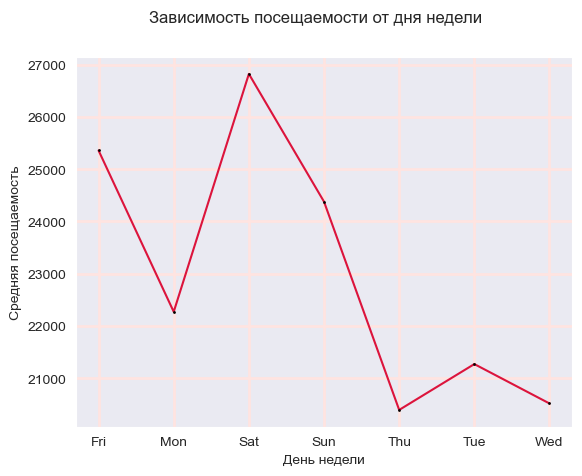

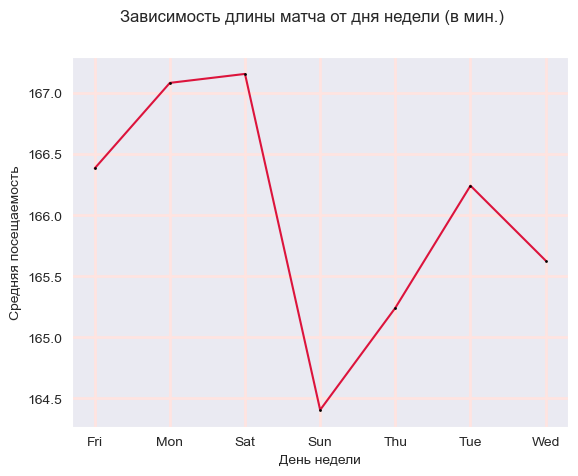

In [40]:
import matplotlib.pyplot as plt

def get_some_dependency_by_day_of_week(data, dependency):
    data_for_plot = data.groupby(by=['day_of_week'])[dependency].mean()
    
    return data_for_plot.keys(), data_for_plot

def make_plot(x_value, y_value, plot_name, y_name, x_name="День недели"):
    plt.figure(plot_name)
    params = {
        'lines.markerfacecolor': 'white',
        'lines.markeredgecolor': 'black',
        'lines.marker': '.',
        'lines.markersize': 2
    }
    plt.rcParams.update(params)

    plt.plot(x_value, y_value, color='crimson')
    plt.suptitle(plot_name)
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.grid(visible=True, color='mistyrose', linewidth=2)
    plt.show()
    
make_plot(
    *get_some_dependency_by_day_of_week(data, 'attendance'),
    plot_name="Зависимость посещаемости от дня недели",
    y_name="Средняя посещаемость"
)

make_plot(
    *get_some_dependency_by_day_of_week(data, 'length_minutes'),
    plot_name="Зависимость длины матча от дня недели (в мин.)",
    y_name="Средняя посещаемость"
)

# 6

Working time = 0.18023681640625


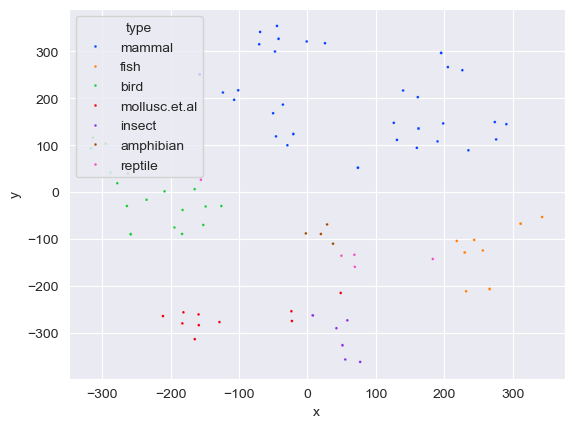

Working time = 0.1766650676727295


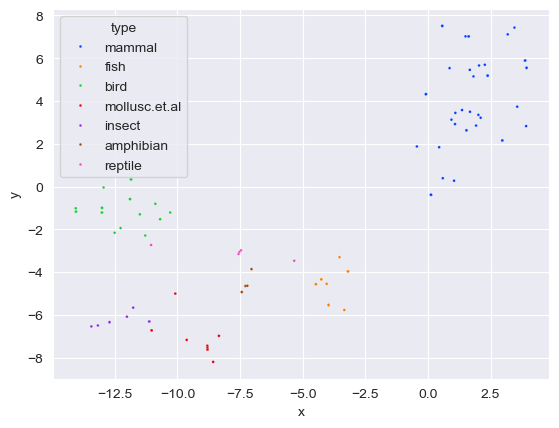

Working time = 0.2329554557800293


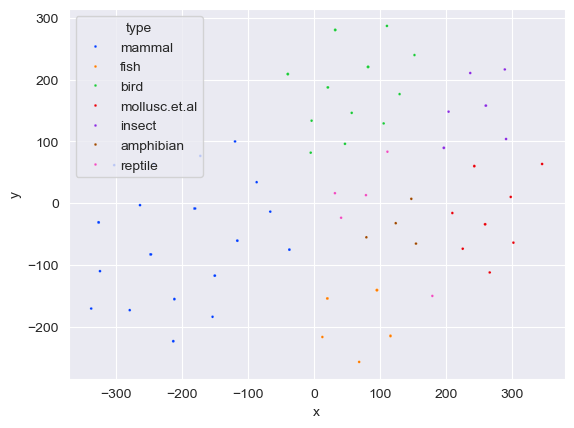

In [41]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
import seaborn as sns
import time

zoo_data = pd.read_csv('Zoo.csv')

new_zoo_data = zoo_data.drop(['type'], axis=1)

scaler = preprocessing.MinMaxScaler()
new_zoo_data = pd.DataFrame(scaler.fit_transform(new_zoo_data), columns=new_zoo_data.columns)

def tsne_plot(data, perplexity):
    start = time.time()
    t = TSNE(n_components=2, perplexity=perplexity, random_state=123)
    TSNE_features = t.fit_transform(data)
    print("Working time = " + str(time.time() - start))
    
    DATA = data.copy()
    DATA['x'] = TSNE_features[:, 0]
    DATA['y'] = TSNE_features[:, 1]
    
    plt.figure()
    sns.scatterplot(x='x', y='y', data=DATA, hue=zoo_data['type'], palette='bright')
    plt.show()
    
tsne_plot(new_zoo_data, 5)
tsne_plot(new_zoo_data, 25)
tsne_plot(new_zoo_data, 50)

# 7

Working time = 7.2999958992004395
5 0.1


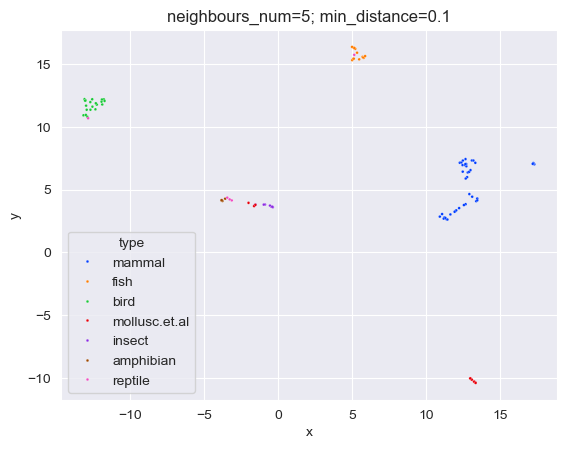

5 0.6


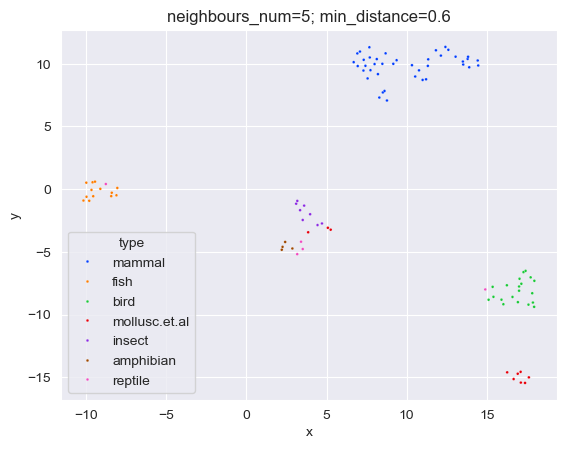

25 0.1


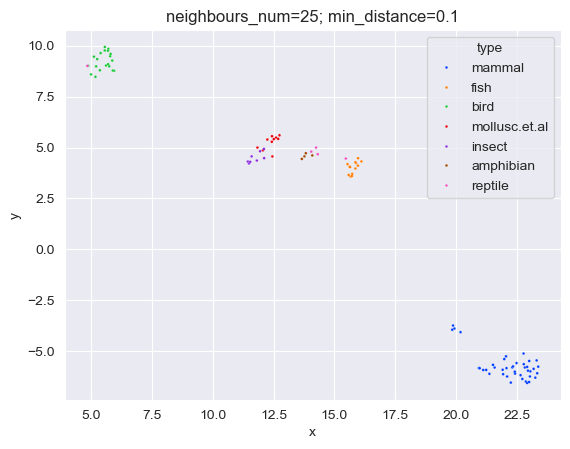

25 0.6


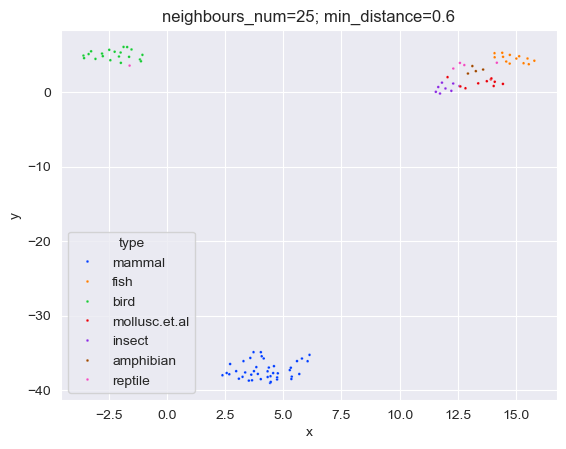

50 0.1


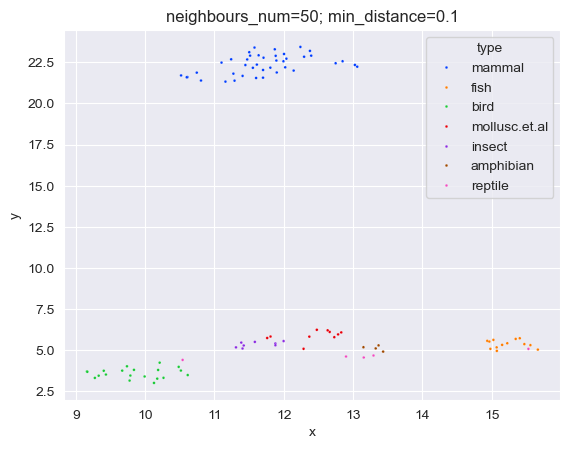

50 0.6


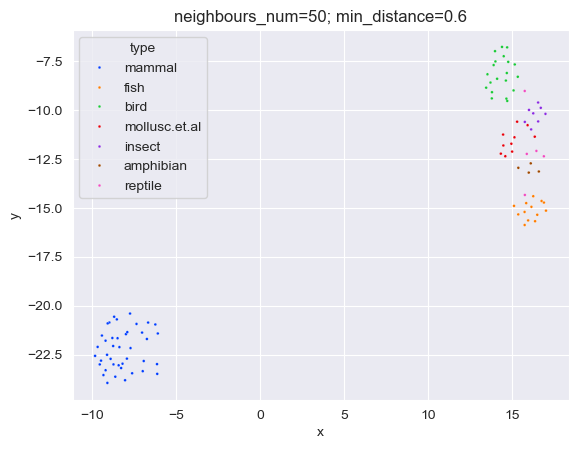

In [47]:
from umap import UMAP

scaler = preprocessing.MinMaxScaler()
new_data = pd.DataFrame(scaler.fit_transform(new_zoo_data), columns=new_zoo_data.columns)

neighbours_num = (5, 25, 50)
min_distance = (0.1, 0.6)

um = dict()
fig = plt.figure()
DATA = new_data.copy()

start = time.time()
for i in range(len(neighbours_num)):
    for j in range(len(min_distance)):
        um[neighbours_num[i], min_distance[j]] = (
            UMAP(n_neighbors=neighbours_num[i], min_dist=min_distance[j]).fit_transform(DATA))
print("Working time = " + str(time.time() - start))

neighbours_num = (5, 25, 50)
min_distance = (0.1, 0.6)

for i in neighbours_num:
    for j in min_distance:
        DATA = new_data.copy()
        DATA['x'] = um[(i, j)][:, 0]
        DATA['y'] = um[(i, j)][:, 1]
        plt.title(label=f'neighbours_num={i}; min_distance={j}')
        sns.scatterplot(x='x', y='y', data=DATA, hue=zoo_data['type'], palette='bright')
        plt.show()
